0
best match 100__M_Left_thumb_finger.bmp
best score 60.86956521739131


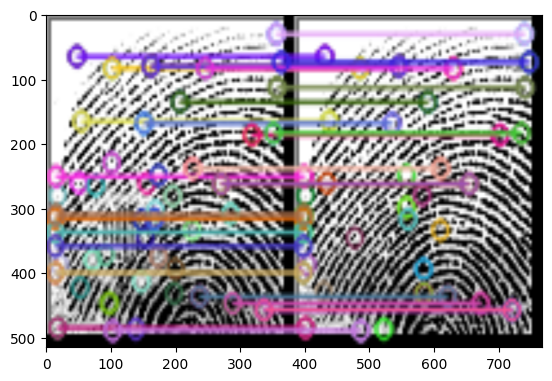

In [6]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Below in testImg, give any finger print image name from folder "test_Finger_prints".


#testImg = "./test_Finger_prints/100__M_Left_index_finger_CR.bmp" 
testImg = "./test_Finger_prints/100__M_Left_thumb_finger_CR.bmp"
#testImg = "./test_Finger_prints/test.tif";
sample = cv2.imread(testImg)
best_score = 0;
filename = None
image = None
kp1, kp2, mp = None, None, None

counter = 0
for file in [file for file in os.listdir("finger-prints")]:
    if counter % 10 == 0:
        print(counter)
    counter+=1
    fingerprint_database_image = cv2.imread("./finger-prints/"+file)
    
    sift = cv2.SIFT_create()
    
    keypoints_1, descriptors_1 = sift.detectAndCompute(sample, None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(fingerprint_database_image, None)
    
    matches = cv2.FlannBasedMatcher(dict(algorithm=1, trees=10), 
             dict()).knnMatch(descriptors_1, descriptors_2, k=2)

    match_points = []
   
    for p, q in matches:
      if p.distance < 0.1*q.distance:
         match_points.append(p) 
    
    keypoints = 0
    if len(keypoints_1) <= len(keypoints_2):
          keypoints = len(keypoints_1)            
    else:
          keypoints = len(keypoints_2)

    if len(match_points) / keypoints * 100> best_score:
        best_score = len(match_points) / keypoints * 100
        filename = file
        image = fingerprint_database_image
        kp1, kp2, mp = keypoints_1, keypoints_2, match_points 
        
print("best match " +filename)
print("best score " +str(best_score))

result = cv2.drawMatches(sample, kp1, image, kp2, mp, None)
result = cv2.resize(result, None, fx=4, fy= 5)
plt.imshow(result)
plt.show()
#cv2.imshow("result", result)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
         
